In [9]:
import torch
import pandas as pd
import numpy as np  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# 数据

train_data = pd.read_csv("D:/code/python/datasets/titanic/train.csv")
test_data = pd.read_csv("D:/code/python/datasets/titanic/test.csv")

test_result = pd.read_csv("D:/code/python/datasets/titanic/gender_submission.csv")

column_to_insert = test_result[['Survived']]

test_data.insert(1,'Survived',column_to_insert)

print(test_data)


train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test_data = test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

# 去除存在空值的行
train_data = train_data.dropna()
test_data = test_data.dropna()

# 数值化处理
# 初始化一个字典来记录每列的映射关系
mappings = {}

# 将非数值类型的列转换为数值并记录映射
for column in train_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    
    # 保存映射关系
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# 打印转换后的数据
# print(train_data.head())
print(mappings)


x_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]
x_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

# 将数据转换为张量
x_train_tensor= torch.tensor(X_scaled,dtype=torch.float32)
y_train_tensor= torch.tensor(y_train.values,dtype=torch.float32)
x_test_tensor= torch.tensor(x_test.values,dtype=torch.float32)
y_test_tensor= torch.tensor(y_test.values,dtype=torch.float32)
# print(x_train_tensor)


     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [3]:
# 模型
class titanic_model(torch.nn.Module):
    def __init__(self):
        super(titanic_model,self).__init__()
        self.l1 = torch.nn.Linear(7,6)
        self.l2 = torch.nn.Linear(6,4)
        self.l3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self,x):
        x = self.sigmoid(self.l1(x))
        x = self.sigmoid(self.l2(x))
        x = self.sigmoid(self.l3(x))
        return x

model =titanic_model()


In [4]:
# 损失函数和优化器
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [ ]:
# 训练
y_train_tensor = y_train_tensor.view(-1,1)
loss_list = []
for epoch in range(1000):
    y_pred = model(x_train_tensor)
    loss = criterion(y_pred,y_train_tensor)
    if epoch%300 == 299:
        print(epoch,loss.item())
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


299 0.6749347448348999
599 0.6734840869903564
899 0.6707727909088135
1199 0.6622667908668518
1499 0.6284900307655334
1799 0.5350554585456848
2099 0.4649585485458374
2399 0.4464290142059326
2699 0.44007864594459534
2999 0.43653959035873413
3299 0.43405649065971375
3599 0.4319823086261749
3899 0.4300745129585266
4199 0.42829424142837524
4499 0.4266165494918823
4799 0.4250684082508087
5099 0.42364048957824707
5399 0.4222677946090698
5699 0.42088884115219116
5999 0.41950246691703796
6299 0.41816675662994385
6599 0.4169375002384186
6899 0.4158385694026947
7199 0.4148685932159424
7499 0.4140101969242096
7799 0.41324079036712646
8099 0.4125385880470276
8399 0.41188520193099976
8699 0.4112658202648163
8999 0.41066861152648926
9299 0.4100852608680725
9599 0.4095101058483124
9899 0.4089399576187134
10199 0.4083729386329651
10499 0.40780776739120483
10799 0.40724316239356995
11099 0.40667733550071716
11399 0.40610814094543457
11699 0.40553227066993713
11999 0.40494585037231445
12299 0.40434363484

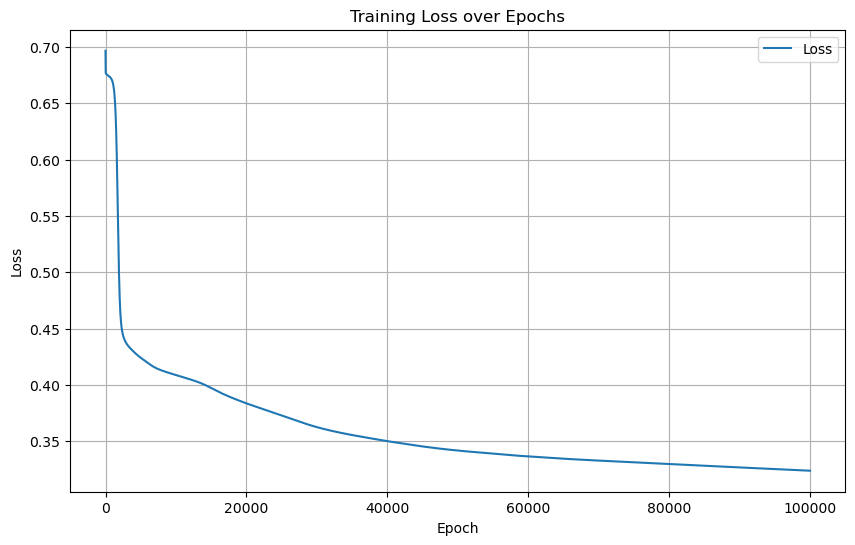

In [6]:
import matplotlib.pyplot as plt

def plot_loss(loss_list):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_list, label="Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

# 调用函数绘制图像
plot_loss(loss_list)


In [29]:
# 测试

y_test_tensor = y_test_tensor.view(-1,1)
y_pred = model(x_test_tensor)

# print(y_pred)
for i in range(y_pred.shape[0]):
    if(y_pred[i] >= 0.5):
        y_pred[i] = 1
    else: y_pred[i] =0

# print(y_test_tensor)
accuracy = (y_pred == y_test_tensor).sum().item()/y_test_tensor.shape[0]
print(accuracy)

0.6314199395770392
